Challenge

Do a little scraping or API-calling of your own. Pick a new website and see what you can get out of it. Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.

Formally, your goal is to write a scraper that will:

1. Return specific pieces of information (rather than just downloading a whole page)
2. Iterate over multiple pages/queries
3. Save the data to your computer

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.

Goal: scrape car prices from craigslist

In [3]:
import numpy as np
import pandas as pd

In [1]:
# make craigslist spider
import scrapy
from scrapy.crawler import CrawlerProcess

class CLSpider(scrapy.Spider):
    name = "CLS"
    
    # Here is where we insert our API call.
    start_urls = [
        'https://portland.craigslist.org/search/cto?'
        ]

    # Identifying the information we want from the query response and extracting it using xpath.
    def parse(self, response):

        
        for item in response.xpath('//li[@class="result-row"]'):
            car = item.xpath('.//a[@class="result-title hdrlnk"]/text()').extract_first()
            price = item.xpath('.//span[@class="result-price"]/text()').extract_first()
            yield {car: price }
        
        next_page = response.xpath('//a[@class="button next"]/@href').extract_first()
        
        print(next_page)
        if next_page is not None:
            next_page = 'https://portland.craigslist.org{}'.format(next_page)
            yield scrapy.Request(next_page, callback=self.parse)
            
# Starting the crawler with our spider.
# process = CrawlerProcess({
#     'FEED_FORMAT': 'json',
#     'FEED_URI': 'Testing4.json'})

process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'cl_data.json',       # Name our storage file.
    'LOG_ENABLED': False,          # Turn off logging for now.
    'ROBOTSTXT_OBEY': True,
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True
})


process.crawl(CLSpider)
process.start()
print('Done')

/search/cto?s=120
/search/cto?s=240
/search/cto?s=360
/search/cto?s=480
/search/cto?s=600
/search/cto?s=720
/search/cto?s=840
/search/cto?s=960
/search/cto?s=1080
/search/cto?s=1200
/search/cto?s=1320
/search/cto?s=1440
/search/cto?s=1560
/search/cto?s=1680
/search/cto?s=1800
/search/cto?s=1920
/search/cto?s=2040
/search/cto?s=2160
/search/cto?s=2280
/search/cto?s=2400
/search/cto?s=2520
/search/cto?s=2640
/search/cto?s=2760
/search/cto?s=2880

None
Done


In [54]:
# make dataframe of cars and prices from saved json object
import json
f = open('cl_data.json')
dct_list = json.loads(f.read())
f.close()

cars = [list(dct.keys())[0] for dct in dct_list]
prices = [list(dct.values())[0] for dct in dct_list]

df = pd.DataFrame()
df['car'] = cars
df['price'] = prices
# df['price'] = df['price'].apply(lambda x: int(str(x)[1:]))
df.head()

,car,price
0,2006 Honda pilot .EX.L 4WD,$2950
1,Lexus rx 300,$4550
2,2011 BMW 528i Clean title Fully loaded,$14600
3,2002 Dodge Grand Caravan Sport Low Miles,$1600
4,Volvo 850,$450


In [66]:
# drop cars without prices and turn price strings into ints
df = df.dropna()
df['price'] = df['price'].apply(lambda x: int(str(x)[1:]))

In [84]:

def get_make(s):
    '''function to determine car make from craigslist post title'''
    car_makes = [
        'Honda',
        'Toyota',
        'Kia',
        'BMW',
        'Mercedes',
        'Audi',
        'Ford',
        'Dodge',
        'Subaru',
        'Lincoln',
        'Lexus',
        'Cadillac',
        'Volkswagen',
        'Acura',
        'Mini',
        'GMC',
        'Hyundai',
        'Mazda',
        'Jeep',
        'Buick',
        'Nissan',
        'Chevy',
        'Volvo',
        'Maserati',
        'Saturn']

    for make in car_makes:
        if make.lower() in s.lower():
            return make
 
    return 'Unknown'

In [101]:
# use get_make to create car make column in dataframe
df['car_make'] = df['car'].apply(get_make)
df.head(6)

,car,price,car_make
0,2006 Honda pilot .EX.L 4WD,2950,Honda
1,Lexus rx 300,4550,Lexus
2,2011 BMW 528i Clean title Fully loaded,14600,BMW
3,2002 Dodge Grand Caravan Sport Low Miles,1600,Dodge
4,Volvo 850,450,Volvo
5,2017 Tesla Model S P100D w/ $12K MusicarNW Aud...,120000,Audi


In [104]:
# drop really expensive cars. These are often not real prices
df = df[df['price']<100000]

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

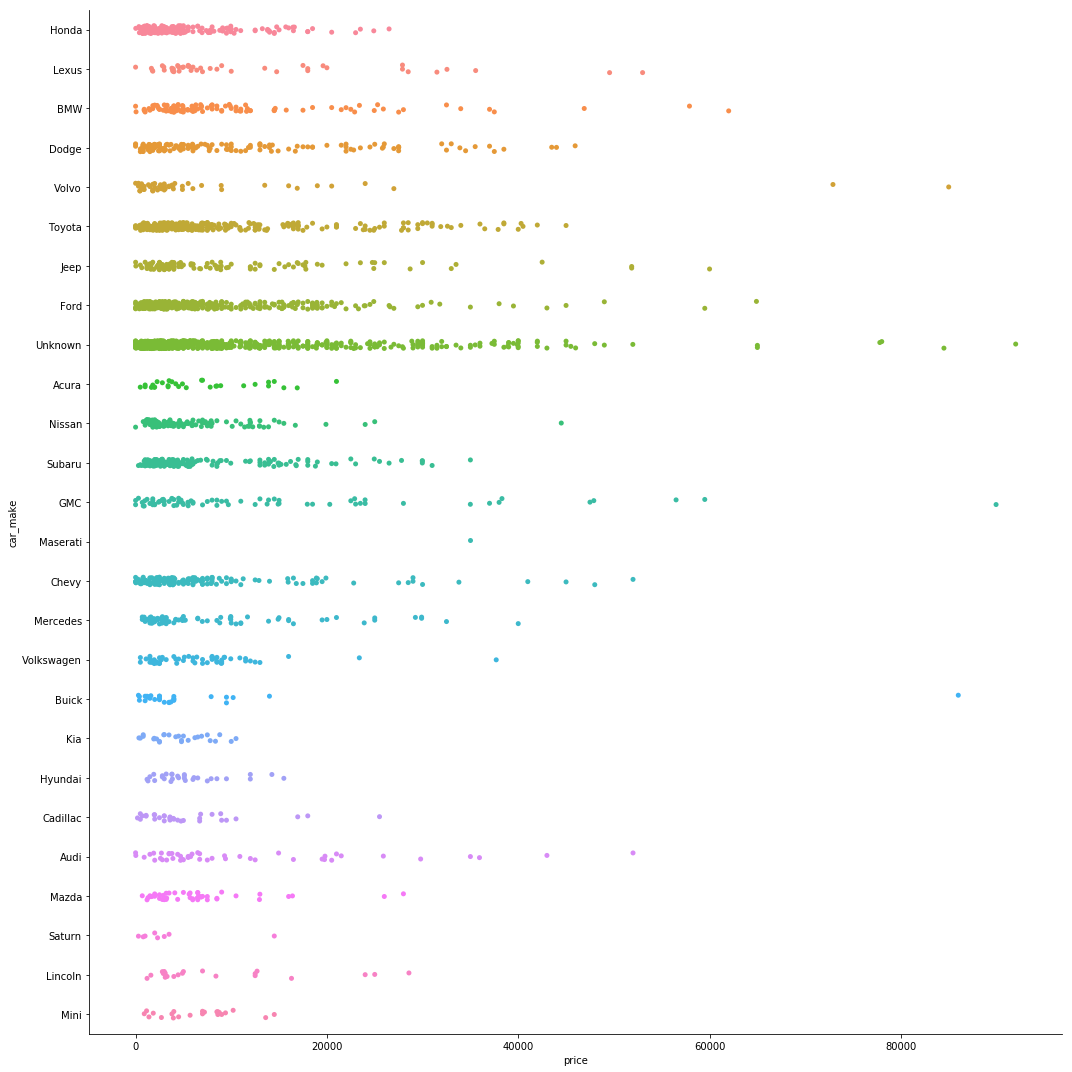

In [109]:
# visualize car prices by make
sns.catplot(x='price', y='car_make', data=df, height=15)

//*[@id="searchform"]/div[3]/div[3]/span[2]/a[3]